In [2]:
# Simple KNN on MNIST
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x = np.concatenate((x_train, x_test))
y = np.concatenate((y_train, y_test))
x = x.reshape((x.shape[0], -1))
x = np.divide(x, 255.)
# 10 clusters
n_clusters = 10
# Runs in parallel 4 CPUs
kmeans = KMeans(n_clusters=n_clusters, n_init=20, n_jobs=4)
# Train K-Means.
y_pred_kmeans = kmeans.fit_predict(x)
# Evaluate the K-Means clustering accuracy.
accuracy = accuracy_score(y, y_pred_kmeans)

In [3]:
# Design autoencoder and decoder
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

from tensorflow.keras.datasets import mnist
import numpy as np

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [4]:
# Let's also create a separate encoder model:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [5]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [6]:
# Insert model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [7]:
(x_train, _), (x_test, _) = mnist.load_data()
# We will normalize all values between 0 and 1 and we will flatten the 28x28 images into vectors of size 784.
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)

(60000, 784)
(10000, 784)


In [8]:
# let's train our autoencoder for 50 epochs:
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 32us/sample - loss: 0.2763 - val_loss: 0.1923
Epoch 2/50
60000/60000 [==============================] - 1s 20us/sample - loss: 0.1726 - val_loss: 0.1550
Epoch 3/50
60000/60000 [==============================] - 1s 23us/sample - loss: 0.1456 - val_loss: 0.1346
Epoch 4/50
60000/60000 [==============================] - 1s 20us/sample - loss: 0.1291 - val_loss: 0.1215
Epoch 5/50
60000/60000 [==============================] - 1s 20us/sample - loss: 0.1185 - val_loss: 0.1130
Epoch 6/50
60000/60000 [==============================] - 1s 19us/sample - loss: 0.1112 - val_loss: 0.1069
Epoch 7/50
60000/60000 [==============================] - 1s 19us/sample - loss: 0.1060 - val_loss: 0.1026
Epoch 8/50
60000/60000 [==============================] - 1s 19us/sample - loss: 0.1022 - val_loss: 0.0996
Epoch 9/50
60000/60000 [==============================] - 1s 19us/sample - loss: 0.0995 - val_

In [9]:
# After 50 epochs, the autoencoder seems to reach a stable train/test loss value of about 0.09. 
# We can try to visualize the reconstructed inputs and the encoded representations. We will use Matplotlib.
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

In [10]:
# use Matplotlib 
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

<Figure size 2000x400 with 20 Axes>

In [11]:
# deeper model
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

encoder = Model(input_img, encoded)
encoded_input = Input(shape=(encoding_dim,)) 
#decoder_layer = autoencoder.layers[-1] 
#decoder = Model(encoded_input, decoder_layer(encoded_input)) 

autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 43us/sample - loss: 0.2414 - val_loss: 0.1656
Epoch 2/50
60000/60000 [==============================] - 3s 42us/sample - loss: 0.1509 - val_loss: 0.1372
Epoch 3/50
60000/60000 [==============================] - 2s 40us/sample - loss: 0.1313 - val_loss: 0.1227
Epoch 4/50
60000/60000 [==============================] - 2s 41us/sample - loss: 0.1204 - val_loss: 0.1159
Epoch 5/50
60000/60000 [==============================] - 2s 35us/sample - loss: 0.1145 - val_loss: 0.1107
Epoch 6/50
60000/60000 [==============================] - 2s 35us/sample - loss: 0.1101 - val_loss: 0.1071
Epoch 7/50
60000/60000 [==============================] - 2s 36us/sample - loss: 0.1074 - val_loss: 0.1051
Epoch 8/50
60000/60000 [==============================] - 2s 34us/sample - loss: 0.1052 - val_loss: 0.1028
Epoch 9/50
60000/60000 [==============================] - 2s 33us/sample - loss: 0.1032 - val_

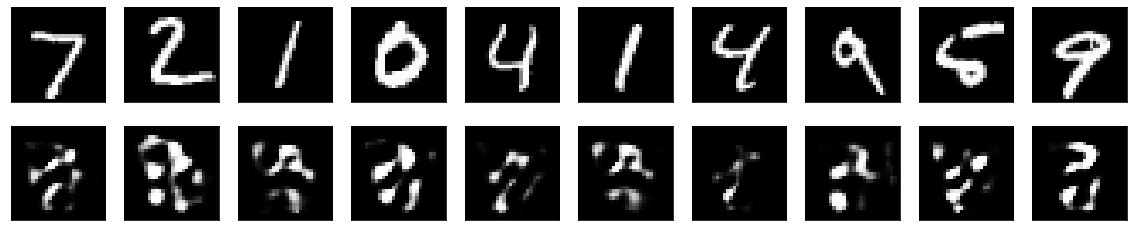

In [12]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [65]:
import pandas as pd

# Regression example
def get_data():
    #get train data
    train_data_path ='/Users/hit028/Desktop/535Assignment7/train.csv'
    train = pd.read_csv(train_data_path)
    
    #get test data
    test_data_path ='/Users/hit028/Desktop/535Assignment7/test.csv'
    test = pd.read_csv(test_data_path)
    
    return train , test

def get_combined_data():
  #reading train data
    train , test = get_data()
    target = train.SalePrice
    train.drop(['SalePrice'],axis = 1 , inplace = True)
    combined = train.append(test)
    combined.reset_index(inplace=True)
    combined.drop(['index', 'Id'], inplace=True, axis=1)
    return combined, target

#Load train and test data into pandas DataFrames
train_data, test_data = get_data()

#Combine train and test data to process them together
combined, target = get_combined_data()

In [66]:
combined.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,...,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,...,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737
std,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,...,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,...,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,...,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,...,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,...,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [67]:
# Drop missing values
def get_cols_with_no_nans(df,col_type):
    '''
    Arguments :
    df : The dataframe to process
    col_type : 
          num : to only get numerical columns with no nans
          no_num : to only get nun-numerical columns with no nans
          all : to get any columns with no nans    
    '''
    if (col_type == 'num'):
        predictors = df.select_dtypes(exclude=['object'])
    elif (col_type == 'no_num'):
        predictors = df.select_dtypes(include=['object'])
    elif (col_type == 'all'):
        predictors = df
    else :
        print('Error : choose a type (num, no_num, all)')
        return 0
    cols_with_no_nans = []
    for col in predictors.columns:
        if not df[col].isnull().any():
            cols_with_no_nans.append(col)
    return cols_with_no_nans

# Call the function
num_cols = get_cols_with_no_nans(combined , 'num')
cat_cols = get_cols_with_no_nans(combined , 'no_num')

In [68]:
# How many columns we got
print ('Number of numerical columns with no nan values :',len(num_cols))
print ('Number of nun-numerical columns with no nan values :',len(cat_cols))

Number of numerical columns with no nan values : 25
Number of nun-numerical columns with no nan values : 20


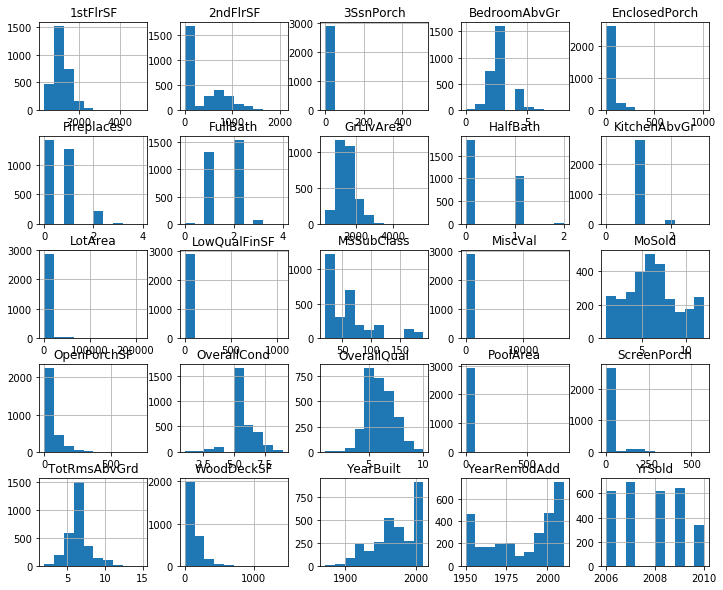

In [69]:
import matplotlib.pyplot as plt
# Plot the variables
combined = combined[num_cols + cat_cols]
combined.hist(figsize = (12,10))
plt.show()

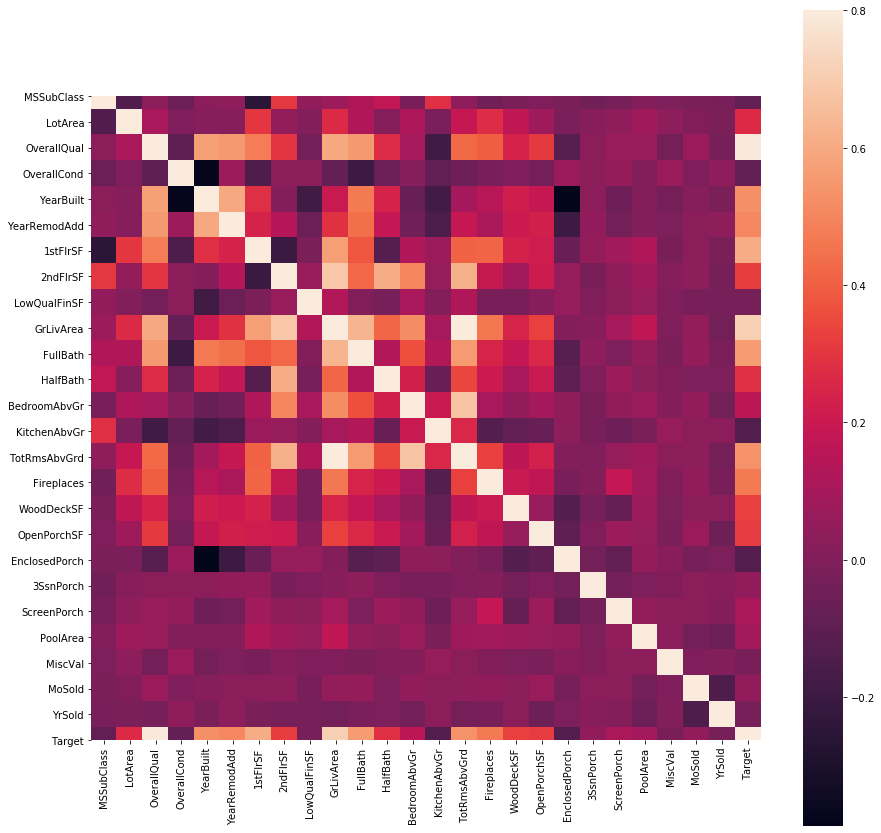

In [70]:
import seaborn as sb
# How many of features are correlated
train_data = train_data[num_cols + cat_cols]
train_data['Target'] = target

C_mat = train_data.corr()
fig = plt.figure(figsize = (15,15))

sb.heatmap(C_mat, vmax = .8, square = True)
plt.show()
# Looks like 15 correlated features

In [71]:
import numpy as np
# We will encode the categorical features using one hot encoding.
def oneHotEncode(df,colNames):
    for col in colNames:
        if( df[col].dtype == np.dtype('object')):
            dummies = pd.get_dummies(df[col],prefix=col)
            df = pd.concat([df,dummies],axis=1)

            #drop the encoded column
            df.drop([col],axis = 1 , inplace=True)
    return df
    

print('There were {} columns before encoding categorical features'.format(combined.shape[1]))
combined = oneHotEncode(combined, cat_cols)
print('There are {} columns after encoding categorical features'.format(combined.shape[1]))

There were 45 columns before encoding categorical features
There are 149 columns after encoding categorical features


In [72]:
# Split data to train and test
def split_combined():
    global combined
    train = combined[:1460]
    test = combined[1460:]

    return train , test 
  
train, test = split_combined()

In [73]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import Sequential

# Use ‘relu’ as the activation function for the hidden layers
# Use a ‘normal’ initializer as the kernal_intializer

#Define the output layer with only one node
#Use ‘linear ’as the activation function for the output layer
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 128)               19200     
_________________________________________________________________
dense_14 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_15 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_16 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 257       
Total params: 184,065
Trainable params: 184,065
Non-trainable params: 0
_________________________________________________________________


In [74]:
from tensorflow.keras.callbacks import ModelCheckpoint
# Define a checkpoint to save the data
checkpoint_name = '/Users/hit028/Desktop/535Assignment7/Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [75]:
# Train the model
hist = NN_model.fit(train, target, epochs=500, batch_size=32, validation_split=0.2, callbacks=callbacks_list)

Train on 1168 samples, validate on 292 samples
Epoch 1/500
 512/1168 [============>.................] - ETA: 0s - loss: 182503.1338 - mean_absolute_error: 182503.1250 
Epoch 00001: val_loss improved from inf to 55352.15753, saving model to /Users/hit028/Desktop/535Assignment7/Weights-001--55352.15753.hdf5
1168/1168 [==============================] - 1s 493us/sample - loss: 131240.7310 - mean_absolute_error: 131240.7188 - val_loss: 55352.1575 - val_mean_absolute_error: 55352.1523
Epoch 2/500
1024/1168 [=========================>....] - ETA: 0s - loss: 57935.4772 - mean_absolute_error: 57935.4805
Epoch 00002: val_loss improved from 55352.15753 to 50003.84102, saving model to /Users/hit028/Desktop/535Assignment7/Weights-002--50003.84102.hdf5
1168/1168 [==============================] - 0s 159us/sample - loss: 56407.0384 - mean_absolute_error: 56407.0391 - val_loss: 50003.8410 - val_mean_absolute_error: 50003.8438
Epoch 3/500
1120/1168 [===========================>..] - ETA: 0s - loss: 469

In [76]:
# Load wights file of the best model :
wights_file = '/Users/hit028/Desktop/535Assignment7/Weights-210--18839.21870.hdf5' # choose the best checkpoint- YOURS IS DIFFERENT THAN THIS NUMBER 
NN_model.load_weights(wights_file) # load it
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

In [77]:
# Make predictions
predictions = NN_model.predict(test)

In [78]:
predictions

array([[117899.48],
       [138204.66],
       [173114.62],
       ...,
       [152982.38],
       [143289.94],
       [215777.38]], dtype=float32)

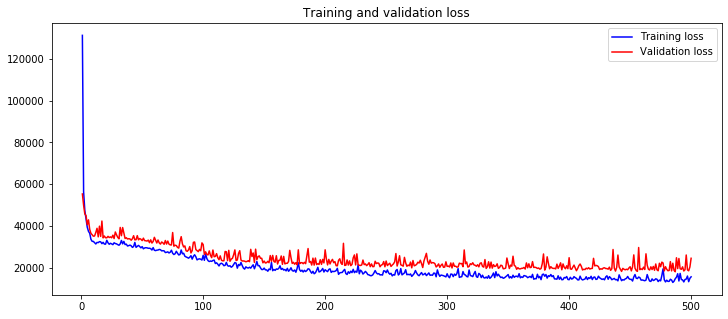

In [80]:
#plt.style.use('ggplot')

def plot_history(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(loss) + 1)

    plt.figure(figsize=(12, 5))
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()


plot_history(hist)

In [81]:
import tensorflow
early_stop = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience= 30)
callbacks_list= ModelCheckpoint('/Users/hit028/Desktop/535Assignment7/Weights-{epoch:03d}--{val_loss:.5f}.hdf5', monitor='val_loss', save_best_only = True)
callbacks = [early_stop, callbacks_list]

In [82]:
hist = NN_model.fit(train, target, epochs=500, batch_size=32, validation_split = 0.2, callbacks=callbacks)

Train on 1168 samples, validate on 292 samples
Epoch 1/500
1168/1168 [==============================] - 1s 461us/sample - loss: 14001.1177 - mean_absolute_error: 14001.1162 - val_loss: 19785.8027 - val_mean_absolute_error: 19785.8027
Epoch 2/500
1168/1168 [==============================] - 0s 112us/sample - loss: 12176.0968 - mean_absolute_error: 12176.0957 - val_loss: 20766.1734 - val_mean_absolute_error: 20766.1738
Epoch 3/500
1168/1168 [==============================] - 0s 119us/sample - loss: 11994.2792 - mean_absolute_error: 11994.2793 - val_loss: 20050.4040 - val_mean_absolute_error: 20050.4043
Epoch 4/500
1168/1168 [==============================] - 0s 155us/sample - loss: 12390.5665 - mean_absolute_error: 12390.5674 - val_loss: 19170.1302 - val_mean_absolute_error: 19170.1328
Epoch 5/500
1168/1168 [==============================] - 0s 167us/sample - loss: 11636.7609 - mean_absolute_error: 11636.7617 - val_loss: 19498.9210 - val_mean_absolute_error: 19498.9199
Epoch 6/500
1168/1

### Queestion 1 : We had a argument named patience in early stopping code. Change this number to 20 and see how number of epochs is changed. What is this patience based on your findings?

In [84]:
import tensorflow
early_stop = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience= 20)
callbacks_list= ModelCheckpoint('/Users/hit028/Desktop/535Assignment7/Weights-{epoch:03d}--{val_loss:.5f}.hdf5', monitor='val_loss', save_best_only = True)
callbacks = [early_stop, callbacks_list]

In [85]:
hist = NN_model.fit(train, target, epochs=500, batch_size=32, validation_split = 0.2, callbacks=callbacks)

Train on 1168 samples, validate on 292 samples
Epoch 1/500
1168/1168 [==============================] - 0s 138us/sample - loss: 12536.7949 - mean_absolute_error: 12536.7939 - val_loss: 19397.5042 - val_mean_absolute_error: 19397.5039
Epoch 2/500
1168/1168 [==============================] - 0s 101us/sample - loss: 11888.0774 - mean_absolute_error: 11888.0762 - val_loss: 20676.4242 - val_mean_absolute_error: 20676.4238
Epoch 3/500
1168/1168 [==============================] - 0s 103us/sample - loss: 11529.2273 - mean_absolute_error: 11529.2266 - val_loss: 19513.9655 - val_mean_absolute_error: 19513.9648
Epoch 4/500
1168/1168 [==============================] - 0s 117us/sample - loss: 12041.6063 - mean_absolute_error: 12041.6064 - val_loss: 19809.8772 - val_mean_absolute_error: 19809.8789
Epoch 5/500
1168/1168 [==============================] - 0s 113us/sample - loss: 12586.5756 - mean_absolute_error: 12586.5752 - val_loss: 19595.6344 - val_mean_absolute_error: 19595.6348
Epoch 6/500
1168/1

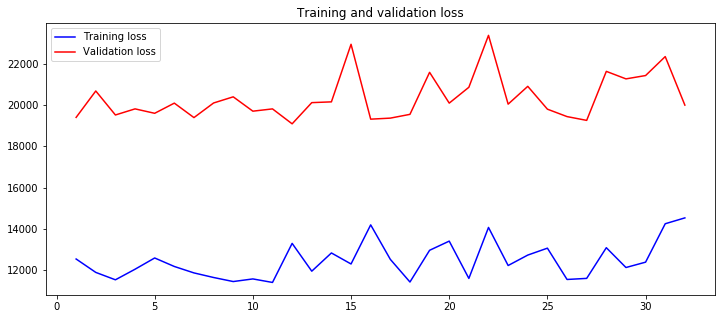

In [86]:
plot_history(hist)

#### Solution for Q1 : When patience was decreased from 30 to 20, the number of epoch was also decreased from 55 to 44. Patience here indicates a threshold that stops the model to be traineed after that point (30 or 20 here) in order to prevent overfitting. So we can control patience which can be the number of epoch here.

#### Question 2 : We trained a regression model but we did not analyze the performance of the model. Suggest a method to see the performance of the model. Note that since we are not dealing with categorical data, we cannot report the accuracy.

In [89]:
# Make predictions
predictions2 = NN_model.predict(train)

In [90]:
predictions2

array([[195503.52],
       [168781.45],
       [212453.34],
       ...,
       [214453.77],
       [137069.42],
       [162658.2 ]], dtype=float32)

In [178]:
target

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [216]:
target21 = [np.asarray(item) for item in target]

In [217]:
target21

[array(208500),
 array(181500),
 array(223500),
 array(140000),
 array(250000),
 array(143000),
 array(307000),
 array(200000),
 array(129900),
 array(118000),
 array(129500),
 array(345000),
 array(144000),
 array(279500),
 array(157000),
 array(132000),
 array(149000),
 array(90000),
 array(159000),
 array(139000),
 array(325300),
 array(139400),
 array(230000),
 array(129900),
 array(154000),
 array(256300),
 array(134800),
 array(306000),
 array(207500),
 array(68500),
 array(40000),
 array(149350),
 array(179900),
 array(165500),
 array(277500),
 array(309000),
 array(145000),
 array(153000),
 array(109000),
 array(82000),
 array(160000),
 array(170000),
 array(144000),
 array(130250),
 array(141000),
 array(319900),
 array(239686),
 array(249700),
 array(113000),
 array(127000),
 array(177000),
 array(114500),
 array(110000),
 array(385000),
 array(130000),
 array(180500),
 array(172500),
 array(196500),
 array(438780),
 array(124900),
 array(158000),
 array(101000),
 array(20250

In [219]:
target22 = np.array(target)
target23 = target22.ravel()

In [220]:
target23

array([208500, 181500, 223500, ..., 266500, 142125, 147500])

In [221]:
predictions23 = np.array(predictions2)
predictions24 = predictions23.ravel()

In [222]:
predictions24

array([195503.52, 168781.45, 212453.34, ..., 214453.77, 137069.42,
       162658.2 ], dtype=float32)

In [223]:
import numpy as np 

# Mean Squared Error 
MSE2 = np.square(np.subtract(target23, predictions24)).mean() 
MSE2

604598268.900671

In [224]:
from sklearn.metrics import mean_squared_error 
mean_squared_error(target23, predictions24) 

604598268.900671

In [225]:
# Calculate RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt

RMSE = sqrt(mean_squared_error(target23, predictions24))
RMSE

24588.580050516764

In [231]:
# Calculated R^2 
from sklearn.metrics import r2_score

coefficient_of_dermination = r2_score(target23, predictions24)
coefficient_of_dermination

0.9041353201048857

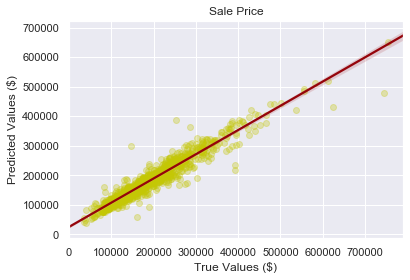

In [226]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

ax = sns.regplot(x=target23, y=predictions24, scatter=True, ci=95, scatter_kws={'alpha':0.3}, color="#c4c705", line_kws={'color':"#95040b"})

plt.title('Sale Price')
plt.xlabel('True Values ($)')
plt.ylabel('Predicted Values ($)')
plt.show(ax)

#### Solution for Q2 : One of the suggestions I can say here is plotting a linear regression graph and analyze it by calculating values like Root Mean Squared Error (RMSE) and R^2. The models are better with lower RMSE. R^2 coefficient here is 0.904, which is pretty close to 1, so I can say this is a pretty good model.